# Introducción al procesamiento digital de imágenes

## Imágenes digitales

Una imagen es una colección de píxeles ordenados. En estándar RGB cada pixel corresponde a 3 valores enteros de 8 bit (256 niveles). Combinándolos formamos colores (aproximadamente 16.7M).

Otra codificación usual para los píxeles consiste en usar un número entre cero y uno para cada canal (color). El estándar RGBA añade un canal que representa la opacidad. Las imágenes en escala de grises y sin opacidad se pueden representar usando un canal.

A continuación se muestra una imagen transformada a escala de grises mediante una combinación de sus canales de color:

(327, 326)

dtype('float64')

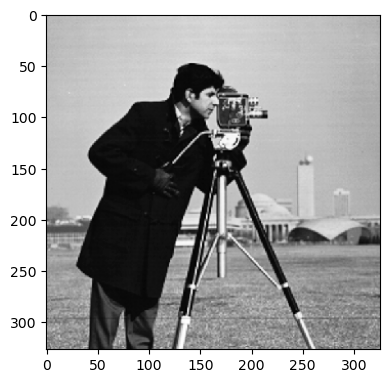

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('img/cameraman.png')

def to_grayscale(img):
    return np.dot(img[:, :, :3], 
                  np.array([0.2989, 0.587, 0.114]))

img_bw = to_grayscale(img)

display(img_bw.shape)
display(img_bw.dtype)

plt.figure(figsize=(4, 4), tight_layout=True)
plt.imshow(img_bw, cmap=plt.cm.Greys_r);

Para nuestros sistemas digitales una imagen es una arreglo multidimensional y podemos operarlo como tal.

> ¿A qué corresponde este segmento del arreglo?

In [2]:
subimg = np.copy(img_bw[50:100, 120:180])
display(subimg)

array([[0.72541766, 0.72933884, 0.72933884, ..., 0.72149649, 0.71757531,
        0.71365413],
       [0.72541766, 0.73326002, 0.73326002, ..., 0.71757531, 0.71365413,
        0.71365413],
       [0.73718119, 0.72541766, 0.72541766, ..., 0.71757531, 0.70189061,
        0.72541766],
       ...,
       [0.03529059, 0.03136941, 0.03136941, ..., 0.15684706, 0.14116236,
        0.18821647],
       [0.03529059, 0.02744824, 0.02744824, ..., 0.15684706, 0.14116236,
        0.23527059],
       [0.03529059, 0.03136941, 0.02352706, ..., 0.15292589, 0.13332001,
        0.27448237]])

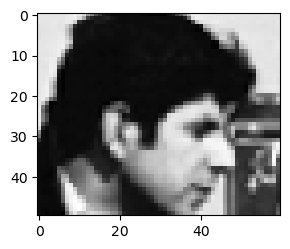

In [3]:
plt.figure(figsize=(3, 3), tight_layout=True)
plt.imshow(subimg, cmap=plt.cm.Greys_r);

¿Y este segmento?

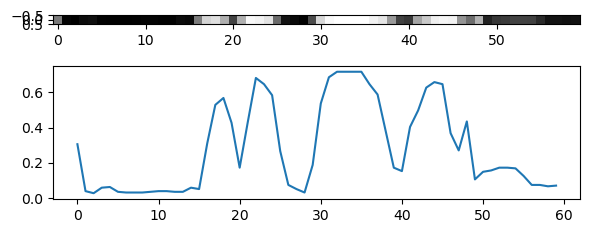

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(6, 3), tight_layout=True)
ax[1].plot(subimg[30, :])
ax[0].imshow(subimg[30:31, :], cmap=plt.cm.Greys_r);

## Convolución  y correlación cruzada discreta

Una herramienta clásica de procesamiento digital de señales es la **convolución**. La operación de convolución entre dos señales unidimensionales discretas es

$$
(f * g) [n] = \sum_{m=-\infty}^\infty  f[m] g[n-m]
$$

y la operación de correlación cruzada es

$$
(f \star g) [n] = \sum_{m=-\infty}^\infty  f[m] g[m+n]
$$

:::{note}

Para ambas operaciones el resultado es una nueva señal que también depende de  $n$.

:::

Por ejemplo el elemento $0$ de $f\star g$ se calcula como

    f[0] g[0] + f[1] g[1] + f[2] g[2] + ...

Luego el elemento $1$ sería

    f[0] g[1] + f[1] g[2] + f[2] g[3] + ...
    


## Filtrado de imágenes con convoluciones

Se puede extender el concepto de convolución a dos dimensiones

$$
(I_1 * I_2) [n_1, n_2] = \sum_{m_1=-\infty}^\infty \sum_{m_2=-\infty}^\infty I_1[m_1, m_2] I_2[n_1-m_2, n_2 - m_2]
$$

donde $n_1$ es el índice de las filas y $n_2$ es el índice de las columnas

:::{note}

La convolución entre dos imágenes es una nueva imagen

:::

- La imagen $I_1$ es la entrada
- La imagen $I_2$ se denomina **filtro o kernel** de la convolución
- La imagen resultante es la imagen filtrada

**Filtro pasa-bajo**

Suaviza, elimina los detalles

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

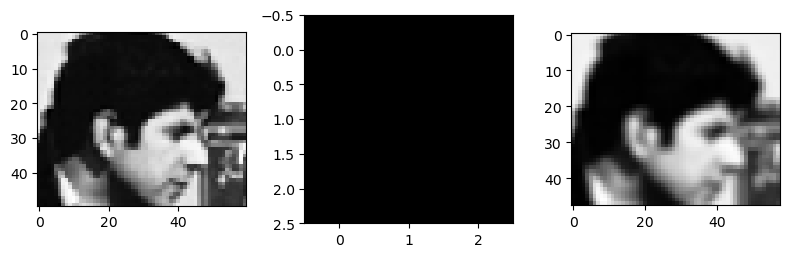

In [5]:
import scipy.signal

D = 3
filt = np.ones(shape=(D, D))

display(filt)
img_res = scipy.signal.correlate2d(subimg, filt/np.sum(filt), mode='valid')

fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True)
ax[0].imshow(subimg, cmap=plt.cm.Greys_r)
ax[1].imshow(filt, cmap=plt.cm.Greys_r)
ax[2].imshow(img_res, cmap=plt.cm.Greys_r);

**Filtro pasa-alto**

Resalta los cambios bruscos, elimina las partes "planas"

array([[ 1., -1.],
       [ 1., -1.]])

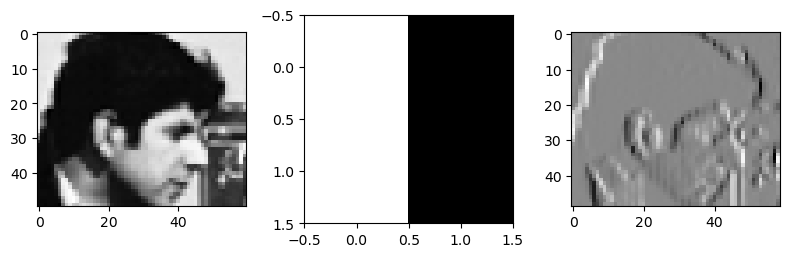

In [6]:
filt = np.array([[1., -1.]]*2)
display(filt)
img_res = scipy.signal.correlate2d(subimg, filt, mode='valid')

fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True)
ax[0].imshow(subimg, cmap=plt.cm.Greys_r)
ax[1].imshow(filt, cmap=plt.cm.Greys_r)
ax[2].imshow(img_res, cmap=plt.cm.Greys_r);

**¿Detector de patillas?**

Detecta patillas de fotógrafos mirando al horizonte.

In [7]:
filt = np.ones(shape=(11, 11))
filt[:9, 2:9] = 0
display(filt)

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

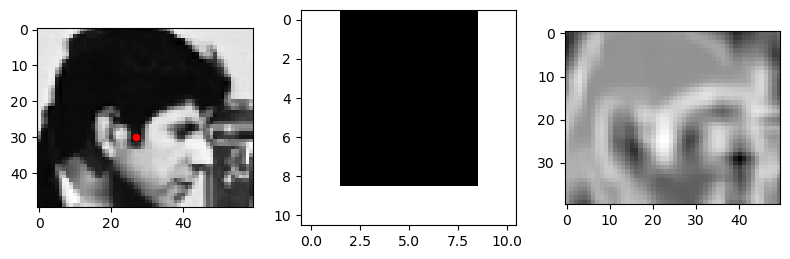

In [9]:
img_res = scipy.signal.correlate2d(subimg, filt-np.mean(filt), mode='valid')

fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True)
ax[0].imshow(subimg, cmap=plt.cm.Greys_r)
maxloc = np.unravel_index(np.argmax(img_res), shape=img_res.shape)
ax[0].scatter(maxloc[1]+filt.shape[0]//2, maxloc[0]+filt.shape[1]//2, c='r', s=20)
ax[1].imshow(filt, cmap=plt.cm.Greys_r)
ax[2].imshow(img_res, cmap=plt.cm.Greys_r);

> En realidad el filtro se activa con cualquier cosa con forma de "U".

:::{important}

Si modificamos los píxeles del kernel podemos crear un filtro para detectar objetos arbitrarios.

:::

Esta es la base de las redes neuronales convolucionales

## Visión computacional

La [visión computacional](http://szeliski.org/Book/) es un campo de investigación que busca que los computadores sean capaces de "comprender" el contenido presente en imágenes digitales y video. Podemos resumir su objetivo como:

> Automatizar tareas realizas por el sistema visual humano

Algunos ejemplos de tareas de visión computacional:

- Clasificación: ¿A qué categoría corresponde el patrón en la imagen?
- Detección, Localización y Segmentación: ¿Dónde está el patrón en la imagen? 
- [Estimación de pose](https://modelzoo.co/blog/deep-learning-models-and-code-for-pose-estimation)
- [Reconstrucción](https://www.youtube.com/watch?v=gg0F5JjKmhA), [super-resolución](https://www.extremetech.com/extreme/132950-csi-style-super-resolution-image-enlargment-yeeaaaah) y [síntesis](https://tcwang0509.github.io/pix2pixHD/)

<a href="https://towardsdatascience.com/detection-and-segmentation-through-convnets-47aa42de27ea"><img src="https://miro.medium.com/max/800/1*SNvD04dEFIDwNAqSXLQC_g.jpeg" width="600"></a>


**Ejemplos de aplicaciones**

- [Medicina](https://www.rsipvision.com/medical-segmentation/)
- [Navegación autónoma](https://www.youtube.com/watch?v=H7Ym3DMSGms)
- [Sistemas de control de tráfico](https://www.youtube.com/watch?v=jxhAWuImxS8)
- [Realidad aumentada](https://www.youtube.com/watch?v=r9hVypi_6TQ)
- [Agricultura y forestal](https://medium.com/@awangenh/mapping-weeds-and-crops-in-precision-agriculture-with-convolutional-neural-networks-138dab87ba00)
- [muchas más...](https://www.cs.ubc.ca/~lowe/vision.html)

**Herramientas**

- Procesamiento digital de imágenes
- Optimización, Estadística 
- Machine learning y en particular  **Redes Neuronales Convolucionales** 


**Desafíos**

- Algoritmos invariantes a los cambios de Iluminación
- Algoritmos invariantes a los cambios de escala y perspectiva (deformación)
- Algoritmos robustos contra la oclusión